<a href="https://colab.research.google.com/github/AmadouSaw/Classification_python/blob/main/classification_suite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Linéaire -- suite

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset Breast cancer

On veut maintenant utiliser le dataset `sklearn.datasets.load_breast_cancer`.

#### 1. Chargez le dataset comme nous l'avons fait pour le dataset `iris`. Pourquoi souhaitons-nous apprendre un modèle de classification sur ce dataset ? Répondez aux questions 2. à 3. du TD précédent pour ce nouveau dataset (utilisez les deux tiers des données pour l'apprentissage).

Chargement du dataset "iris"

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

Pourquoi apprendre un modèle de classification sur ce dataset?

In [3]:
# Description des données
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**On veut faire la prédiction avec une variable dépendante qui est class:**

                - WDBC-Malignant
                - WDBC-Benign

**Cela nous permet de dire que nous avons un problème de classification**.  

#### 2. Utilisez l'algorithme `sklearn.linear_model.LogisticRegression` pour apprendre un modèle en utilisant une régularisation de type `l2` et le solveur `liblinear`. Calculez l'erreur empirique et l'erreur en généralisation.

Le domaine des instances $\mathcal{X}$ est **$\mathcal{R}^{30}$** et l'ensemble des étiquettes $\mathcal{Y}$ est **{0,1}** car je dispose de deux classes.

Transformation des données en une DataFrame de la librairie pandas.

In [4]:
X = pd.DataFrame(cancer.data, columns=['mean radius' ,'mean texture', 'mean perimeter' ,'mean area',
    'mean smoothness' ,'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error' ,'concavity error',
    'concave points error' ,'symmetry error' ,'fractal dimension error',
    'worst radius' ,'worst texture', 'worst perimeter' ,'worst area',
    'worst smoothness', 'worst compactness' ,'worst concavity',
    'worst concave points' ,'worst symmetry' ,'worst fractal dimension'])
y = pd.Series(cancer.target)

la fonction sklearn.model_selection.train_test_split pour diviser les données en un ensemble d'entraînement et de test

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67)

In [6]:
X_train.shape

(381, 30)

In [7]:
X_test.shape

(188, 30)

In [8]:
y_train.shape

(381,)

In [9]:
y_test.shape

(188,)

Utilisation l'algorithme sklearn.linear_model.LogisticRegression pour apprendre un modèle en utilisant une régularisation de type l2 et le solveur liblinear

In [10]:
from sklearn.linear_model import LogisticRegression

clf_cancer = LogisticRegression(random_state=0, penalty='l2', solver='liblinear').fit(X, y)

Calcul de l'erreur empirique et de l'erreur en généralisation.

In [12]:
from sklearn.metrics import mean_squared_error

print("erreur empirique: " , mean_squared_error(y_train, clf_cancer.predict(X_train)))
print("erreur en généralisation: " , mean_squared_error(y_test, clf_cancer.predict(X_test)))

erreur empirique:  0.03674540682414698
erreur en généralisation:  0.047872340425531915


#### 3. Par défaut la régression logistique permet d'apprendre des classificateurs linéaires. En vous inspirant des cours sur la régression, proposez une solution pour apprendre des classificateurs non linéaires en utilisant une régression logistique. Justifiez votre approche et vos éventuels choix de paramètres.

Pour permettre au modèle de s'ajuster à des données ayant des relations non-linéaires on veut modifier nos données en rajoutant les dimensions suivantes: x 2 , x 3 , ..., x d . Il existe une classe d'objects de scikit-learn qui fait justement ça:

In [13]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

(Notez le paramètre include_bias, que se passe t-il si on le met a vrai?).

In [14]:

from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

d = 4
poly_log_lin = make_pipeline(PolynomialFeatures(d),
                           LogisticRegression(random_state=0, penalty='l2', solver='liblinear'))
poly_log_lin.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('logisticregression',
                 LogisticRegression(random_state=0, solver='liblinear'))])

#### 4. Calculez l'erreur empirique et l'erreur en généralisation des modèles appris par votre approche. Que constatez-vous ?

In [16]:
from sklearn.metrics import zero_one_loss

print("erreur empirique: " ,zero_one_loss(y_train, poly_log_lin.predict(X_train)))
print("erreur en généralisation: " ,zero_one_loss(y_test, poly_log_lin.predict(X_test)))

erreur empirique:  0.04199475065616798
erreur en généralisation:  0.06914893617021278


Nous constatons que la regression logistique est meilleure que la regression logistique polynômiale en ces termes que les erreurs sont plus petites par rapport à la regression logistique polynômiale.

#### 5. Utilisez l'algorithme du `sklearn.neighbors.KNeighborsClassifier` pour apprendre un nouveau modèle. Un paramètre très important de cet algorithme est le nombre `n_neighbors` de voisins sélectionnés.  Quelle valeur vous semble la plus appropriée pour ce dataset ? Justifiez.

## Dataset Two moons

In [17]:
from sklearn.datasets import make_moons
moons = make_moons(1000,noise=0.1)
moons_data = pd.DataFrame(moons[0])
moons_target = pd.Series(moons[1])

On va disviser nos données en données d'apprentissage et de test

In [66]:
from sklearn.model_selection import train_test_split

moons_train, moons_test, ymoons_train, ymoons_test = train_test_split(moons_data, moons_target, train_size=0.67)

Apprenons notre modèle par les knn

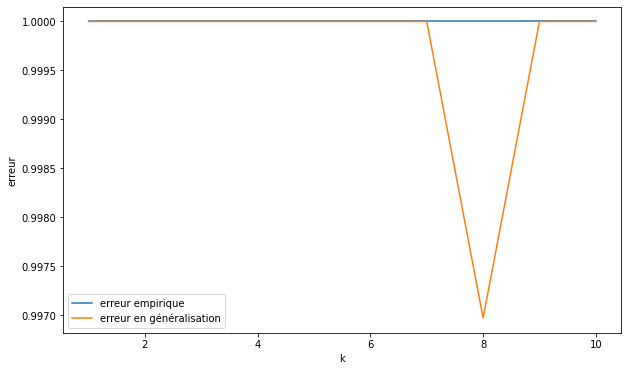

In [67]:
from sklearn.neighbors import KNeighborsClassifier

#moons_train, moons_test, ymoons_train, ymoons_test = train_test_split(moons_data, moons_target, train_size=0.67)

erreur_emp = []
erreur_gen = []
# On va faire varier k de 1 à 11
k_s = range(1, 11)

for k in k_s:
    # construction du modèle
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(moons_train, ymoons_train)
    # ajout des erreurs empiriques
    erreur_emp.append(clf.score(moons_train, ymoons_train))
    # ajout des erreurs en généralisation
    erreur_gen.append(clf.score(moons_test, ymoons_test))

#Affichage des erreurs
plt.figure(figsize=(10,6))
plt.plot(k_s, erreur_emp, label="erreur empirique")
plt.plot(k_s, erreur_gen, label="erreur en généralisation")
plt.ylabel("erreur")
plt.xlabel("k")
plt.legend()

#### 6. Les approches non linéaires sont plutôt décevantes sur le dataset `breast cancer`. Montrez leur intérêt en étudiant le dataset jouet two moons créé ci-dessus. N'oubliez pas que vous pouvez utiliser la méthode `visualize` pour afficher la frontière de décision d'un classificateur sur des données en 2 dimensions.